In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.animation as animation
from IPython.display import display, clear_output
from IPython.display import HTML
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128

In [ ]:
df = pd.read_csv('/content/linear_regression_test.csv')

In [ ]:
df

,House Size,No of Bedroom,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


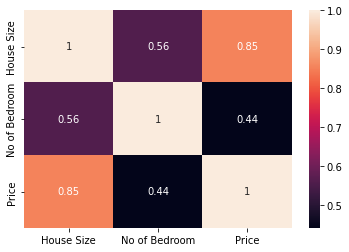

In [ ]:
sb.heatmap(df.corr(), annot=True)

### Finding Correlation

Covariance(x,y) = sum_i((xi - mean(x)) * (yi - mean(y)))/n 

signifies the direction of linear relationship between 2 feature.

Correlation = Covariance(x,y)/(std(x) * std(y))

signifies the strength of relationship between 2 feature.



In [ ]:
mean_houseSize = df['House Size'].mean()
mean_bedroom = df['No of Bedroom'].mean()
mean_price = df['Price'].mean()

In [ ]:
correlation_result = {}
for column_x in df.columns:
    correlation_result[column_x] = {}
    for column_y in df.columns:
        cov = sum((df[column_x] - df[column_x].mean()) * (df[column_y] - df[column_y].mean())) / len(df)
        corr = cov/(df[column_x].std() * df[column_y].std())

        correlation_result[column_x][column_y] = corr

In [ ]:
correlation_result

{'House Size': {'House Size': 0.9787234042553191,
  'No of Bedroom': 0.5480530085007617,
  'Price': 0.8367963674977398},
 'No of Bedroom': {'House Size': 0.5480530085007617,
  'No of Bedroom': 0.9787234042553192,
  'Price': 0.4328513060479304},
 'Price': {'House Size': 0.8367963674977398,
  'No of Bedroom': 0.4328513060479304,
  'Price': 0.9787234042553191}}

### Plot it

In [ ]:
px.scatter_3d(df, x='House Size', y='No of Bedroom', z='Price').show()

## Outliers

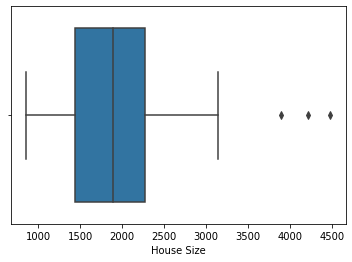

In [ ]:
sb.boxplot(x=df['House Size'])

In [ ]:
# iqr_housesize = df['House Size'].quantile(0.75) - df['House Size'].quantile(0.25)
# ub_housesize = df['House Size'].quantile(0.75) + (1.5 * iqr_housesize)
# ub_housesize

In [ ]:
# df['House Size'] = np.where(df['House Size']>3524.5, 3524.5, df['House Size'])

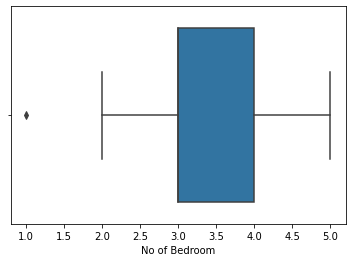

In [ ]:
sb.boxplot(x=df['No of Bedroom'])

In [ ]:
# iqr_bedroom = df['No of Bedroom'].quantile(0.75) - df['No of Bedroom'].quantile(0.25)
# lb_bedroom = df['No of Bedroom'].quantile(0.25) - (1.5 * iqr_bedroom)
# lb_bedroom

In [ ]:
# df['No of Bedroom'] = np.where(df['No of Bedroom']<1.5, 1.5, df['No of Bedroom'])

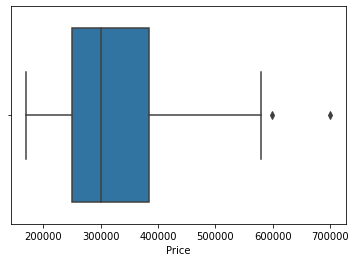

In [ ]:
sb.boxplot(x=df['Price'])

In [ ]:
# iqr_price = df['Price'].quantile(0.75) - df['Price'].quantile(0.25)
# ub_price = df['Price'].quantile(0.75) + (1.5 * iqr_price)
# ub_price

In [ ]:
# df['Price'] = np.where(df['Price']>586275.0, 586275.0, df['Price'])

In [ ]:
df.shape

(47, 3)

## Lets Standartize it

z = (xi-mean(x))/std(x)

In [ ]:
for column in df.columns:
    if column != "Price":
        df[column] = (df[column] - df[column].mean()) / df[column].std()

In [ ]:
fig = px.scatter(df, x='No of Bedroom', y='House Size')
fig.show()

In [ ]:
px.scatter(df, x="House Size", y="Price").show()

## Hypothesis function

Linear Regression Hypothesis function

f(x) = y = c + m1x1 + m2x2 + m3x3 +.....+ mnxn

Since we have 2 feature so,

f(x) = y = c + m1x1 + m2x2

## Cost Function / Loss Function

MSE = Mean Squared Error

mse = 1/2m * [ sum(y_pred - y_actual)^2 + lambda(||theta||_2^2) ]

---

MAE = Mean Absolute Error

mae = 1/2m * [ sum(abs(y_pred - y_actual)) + lambda(||theta||_2^2) ]

---

RMSE = Root Mean Square Error

rmse = sqrt(mse) 

In [ ]:
labels = df.iloc[:,-1]
labels

0     399900
1     329900
2     369000
3     232000
4     539900
5     299900
6     314900
7     198999
8     212000
9     242500
10    239999
11    347000
12    329999
13    699900
14    259900
15    449900
16    299900
17    199900
18    499998
19    599000
20    252900
21    255000
22    242900
23    259900
24    573900
25    249900
26    464500
27    469000
28    475000
29    299900
30    349900
31    169900
32    314900
33    579900
34    285900
35    249900
36    229900
37    345000
38    549000
39    287000
40    368500
41    329900
42    314000
43    299000
44    179900
45    299900
46    239500
Name: Price, dtype: int64

In [ ]:
labels = np.array(labels).reshape((labels.shape[0], 1))

In [ ]:
x = np.array([[df['House Size'][i], df['No of Bedroom'][i]] for i in range(len(df))])

In [ ]:
x

array([[ 1.30009869e-01, -2.23675187e-01],
       [-5.04189838e-01, -2.23675187e-01],
       [ 5.02476364e-01, -2.23675187e-01],
       [-7.35723065e-01, -1.53776691e+00],
       [ 1.25747602e+00,  1.09041654e+00],
       [-1.97317285e-02,  1.09041654e+00],
       [-5.87239800e-01, -2.23675187e-01],
       [-7.21881404e-01, -2.23675187e-01],
       [-7.81023044e-01, -2.23675187e-01],
       [-6.37573110e-01, -2.23675187e-01],
       [-7.63567023e-02,  1.09041654e+00],
       [-8.56737193e-04, -2.23675187e-01],
       [-1.39273340e-01, -2.23675187e-01],
       [ 3.11729182e+00,  2.40450826e+00],
       [-9.21956312e-01, -2.23675187e-01],
       [ 3.76643089e-01,  1.09041654e+00],
       [-8.56523009e-01, -1.53776691e+00],
       [-9.62222960e-01, -2.23675187e-01],
       [ 7.65467909e-01,  1.09041654e+00],
       [ 1.29648433e+00,  1.09041654e+00],
       [-2.94048269e-01, -2.23675187e-01],
       [-1.41790005e-01, -1.53776691e+00],
       [-4.99156507e-01, -2.23675187e-01],
       [-4.

We need to add ones in the beginning beacause we also need to update the weights of `c` also.

y = c + m1x1 + m2x2 = c.1 + m1x1 + m2x2

In [ ]:
X_initial = np.hstack((np.ones((len(df), 1)), x))

In [ ]:
X_initial.shape

(47, 3)

In [ ]:
X_initial

array([[ 1.00000000e+00,  1.30009869e-01, -2.23675187e-01],
       [ 1.00000000e+00, -5.04189838e-01, -2.23675187e-01],
       [ 1.00000000e+00,  5.02476364e-01, -2.23675187e-01],
       [ 1.00000000e+00, -7.35723065e-01, -1.53776691e+00],
       [ 1.00000000e+00,  1.25747602e+00,  1.09041654e+00],
       [ 1.00000000e+00, -1.97317285e-02,  1.09041654e+00],
       [ 1.00000000e+00, -5.87239800e-01, -2.23675187e-01],
       [ 1.00000000e+00, -7.21881404e-01, -2.23675187e-01],
       [ 1.00000000e+00, -7.81023044e-01, -2.23675187e-01],
       [ 1.00000000e+00, -6.37573110e-01, -2.23675187e-01],
       [ 1.00000000e+00, -7.63567023e-02,  1.09041654e+00],
       [ 1.00000000e+00, -8.56737193e-04, -2.23675187e-01],
       [ 1.00000000e+00, -1.39273340e-01, -2.23675187e-01],
       [ 1.00000000e+00,  3.11729182e+00,  2.40450826e+00],
       [ 1.00000000e+00, -9.21956312e-01, -2.23675187e-01],
       [ 1.00000000e+00,  3.76643089e-01,  1.09041654e+00],
       [ 1.00000000e+00, -8.56523009e-01

In [ ]:
theta_initial = np.zeros((X_initial.shape[1], 1))

In [ ]:
theta_initial.shape

(3, 1)

In [ ]:
# y
h = np.matmul(X_initial, theta_initial)

In [ ]:
h.shape

(47, 1)

In [ ]:
h

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
h-labels

array([[-399900.],
       [-329900.],
       [-369000.],
       [-232000.],
       [-539900.],
       [-299900.],
       [-314900.],
       [-198999.],
       [-212000.],
       [-242500.],
       [-239999.],
       [-347000.],
       [-329999.],
       [-699900.],
       [-259900.],
       [-449900.],
       [-299900.],
       [-199900.],
       [-499998.],
       [-599000.],
       [-252900.],
       [-255000.],
       [-242900.],
       [-259900.],
       [-573900.],
       [-249900.],
       [-464500.],
       [-469000.],
       [-475000.],
       [-299900.],
       [-349900.],
       [-169900.],
       [-314900.],
       [-579900.],
       [-285900.],
       [-249900.],
       [-229900.],
       [-345000.],
       [-549000.],
       [-287000.],
       [-368500.],
       [-329900.],
       [-314000.],
       [-299000.],
       [-179900.],
       [-299900.],
       [-239500.]])

In [ ]:
(h-labels).T

array([[-399900., -329900., -369000., -232000., -539900., -299900.,
        -314900., -198999., -212000., -242500., -239999., -347000.,
        -329999., -699900., -259900., -449900., -299900., -199900.,
        -499998., -599000., -252900., -255000., -242900., -259900.,
        -573900., -249900., -464500., -469000., -475000., -299900.,
        -349900., -169900., -314900., -579900., -285900., -249900.,
        -229900., -345000., -549000., -287000., -368500., -329900.,
        -314000., -299000., -179900., -299900., -239500.]])

In [ ]:
(h-labels).transpose() @ (h-labels)

array([[6.16560552e+12]])

In [ ]:
theta_initial

array([[0.],
       [0.],
       [0.]])

In [ ]:
(h-labels).shape

(47, 1)

In [ ]:
# (3,1) - 0.1*(3,1) = (3,1)
theta_initial - 0.1 * ((X_initial.transpose()@(h-labels))/X_initial.shape[0])

array([[34041.26595745],
       [10463.29337662],
       [ 5412.36838441]])

X = (47, 3)

theta = (3, 1)

h = (47, 1)

In [ ]:
def hypothesis_func(X, theta):
    h = X @ theta
    return h

h-labels.T = (1, 47)

h-labels = (47, 1)

Gives scaler value

In [ ]:
sum([item[0]**2 for item in theta_initial])

0.0

In [ ]:
def cost_func(h, labels, lmbd, theta):
    return (1/(2*h.shape[0])) * (((h-labels).transpose() @ (h-labels)) + (lmbd * (theta.transpose() @ theta)))

X = (47, 3)

In [ ]:
def gradient_descent(X, h, labels, lmbd):
    return (1/X.shape[0]) * ((X.transpose() @ (h-labels)) + (lmbd * theta))

In [ ]:
X = X_initial.copy()
theta = theta_initial.copy()

In [ ]:
theta

array([[0.],
       [0.],
       [0.]])

In [ ]:
X = X
theta = theta
labels = labels
learning_rate = 0.01
all_cost = []
all_thetas = []
all_h = []
n_epochs = 500
all_grad = []
grad = np.array([[1.0], [1.0], [1.0]])
count = 0
lmbd = 0.5 # Regularization Parameter
# for _ in range(n_epochs):
while round(grad[0][0]) != 0 or round(grad[1][0]) != 0 or round(grad[2][0]) != 0: # Repeat until convergence i.e. gradient ~ 0
    # Calculate hypothesis function
    h = hypothesis_func(X, theta)
    all_h.append(h)
    
    # Caluclate the cost function
    loss = cost_func(h, labels, lmbd, theta)
    all_cost.append(loss)

    # Calculate the gradien descent
    grad_descent = gradient_descent(X, h, labels, lmbd)
    all_grad.append(grad_descent)
    grad = grad_descent

    if loss < 0:
        # Update the theta
        theta = theta + (learning_rate * grad_descent)
        all_thetas.append(theta)
    elif loss > 0:
        # Update the theta
        theta = theta - (learning_rate * grad_descent)
        all_thetas.append(theta)
    

    count += 1

    


In [ ]:
count

2450

In [ ]:
all_grad[len(all_grad)-1]

array([[-5.34940417e-06],
       [-4.99172643e-01],
       [ 4.99172643e-01]])

In [ ]:
all_grad

[array([[-340412.65957447],
        [-104632.93376618],
        [ -54123.68384408]]), array([[-336972.318866  ],
        [-103301.10911407],
        [ -53014.76090295]]), array([[-333566.74755831],
        [-101988.53851054],
        [ -51924.10832579]]), array([[-330195.59425852],
        [-100694.93133214],
        [ -50851.43983021]]), array([[-326858.51112506],
        [ -99420.0013997 ],
        [ -49796.47355898]]), array([[-323555.15383177],
        [ -98163.46691013],
        [ -48758.93201185]]), array([[-320285.18153241],
        [ -96925.05036924],
        [ -47738.54197851]]), array([[-317048.25682543],
        [ -95704.47852559],
        [ -46735.03447248]]), array([[-313844.04571922],
        [ -94501.48230539],
        [ -45748.14466611]]), array([[-310672.21759759],
        [ -93315.79674834],
        [ -44777.61182649]]), array([[-307532.4451857 ],
        [ -92147.16094453],
        [ -43823.17925247]]), array([[-304424.40451627],
        [ -90995.31797223],
        [

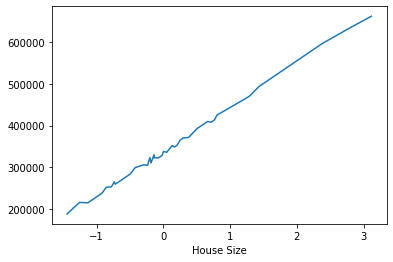

In [ ]:
sb.lineplot(data=df, x="House Size", y=(all_h)[len(all_h)-1].reshape(1, all_h[0].shape[0])[0])

## Gradient

In [ ]:
px.line(x=list(range(len(all_grad))), y=[[item[0][0] for item in all_grad], [item[1][0] for item in all_grad], [item[2][0] for item in all_grad]]).show()

In [ ]:
size = all_h[0].shape[0]

In [ ]:
px.scatter(df, x="House Size", y="Price", trendline='ols').show()

fig1 = px.line(df, x="House Size", y=(all_h)[len(all_h)-1].reshape(1, size)[0])
fig2 = px.scatter(df, x="House Size", y="Price")
fig3 = go.Figure(data=fig1.data + fig2.data)
fig3.show()

In [ ]:
px.line_3d(df, x='House Size', y='No of Bedroom', z=(all_h)[n_epochs-1].reshape(1, size)[0]).show()

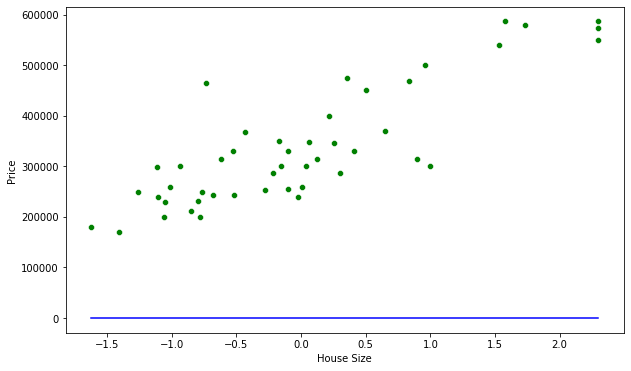

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

def animate(i):
    ax.clear()
    sb.lineplot(x=df['House Size'], y=np.array(all_h[i]).reshape(47,), data=df, color="blue", ax=ax)
    sb.scatterplot(x=df['House Size'], y=df['Price'], data=df, color="green", ax=ax)
    

ani = animation.FuncAnimation(fig, animate, frames=n_epochs, interval=100, repeat=True)
HTML(ani.to_html5_video())

In [ ]:
px.scatter(x=list(range(len(all_cost))), y=[item[0][0] for item in all_cost]).show()

In [ ]:
px.scatter_3d(x=[item[1][0] for item in all_thetas], y=[item[2][0] for item in all_thetas], z=[item[0][0] for item in all_cost]).show()